# Tax or Trade

#### Notebook for setting up, running and visualising the agent based model

### How to use:

1. Update the variables as required
2. Run the cell containing the variables
3. Run the cell calling the java file (or do this from a terminal)
4. Wait for the model to complete (usually only a couple of seconds)
5. Run the cell setting up the plots

## Cell 1: Import libraries and set variables




In [1]:
from functions.functions import analysis
from matplotlib import pyplot as plt

runs            = 100  
runLength       = 15        
seed            = 1  

tax             = 120
trade           = 5

preset          = 'EU-2016' 

analysis = analysis(runs, seed, tax, trade, runLength, preset)

## Cell 2: Run the model

The first two lines recompile the program and move it to this directory, keep them commented out if not needed

In [2]:
! cd ../model/ && mvn clean compile assembly:single -q && cd ../analysis/
! mv ../model/target/model-1.0-SNAPSHOT-jar-with-dependencies.jar model.jar && echo "Built and moved the model\n"

args = analysis.getJarArguments()
! cd temp && java -jar ../model.jar $args 

Built and moved the model

Finished 100 Tax runs with tax rate 120 using seeds in the range [1, 100]
Finished 100 Trade runs with cap reduction rate 5.0 using seeds in the range [1, 100]


## Cell 3: Show the area plots

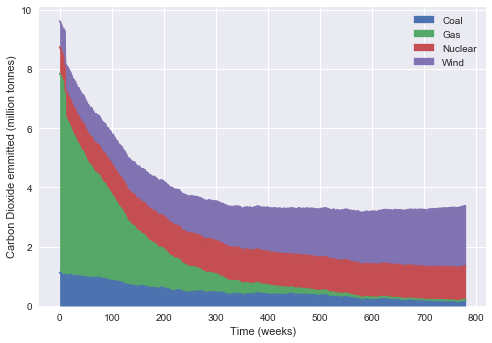

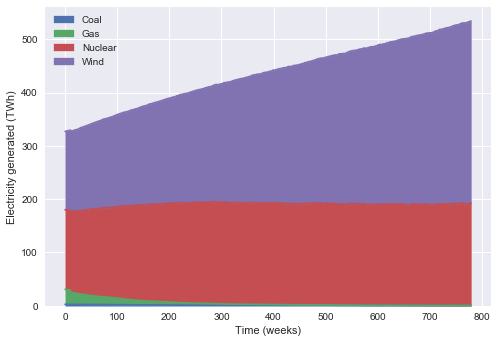

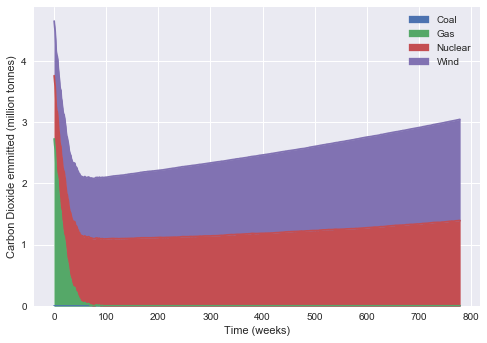

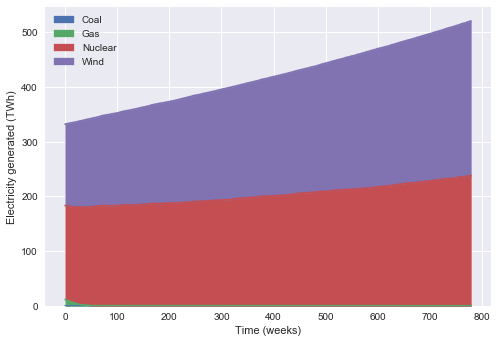

In [3]:
analysis.plotArea()
plt.show()

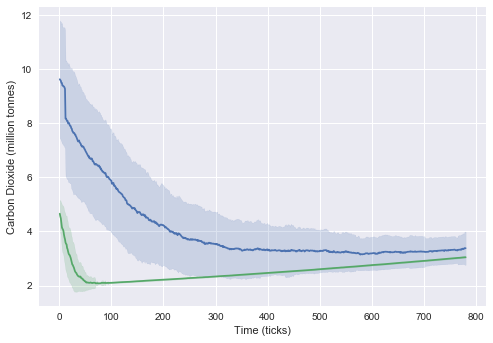

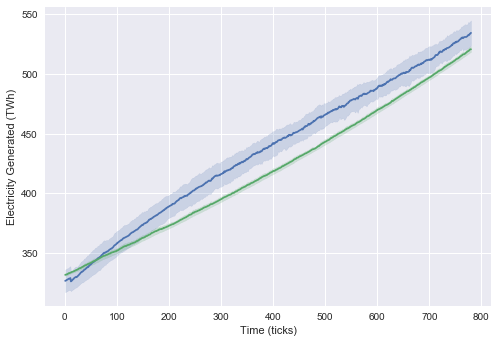

In [4]:
analysis.plotComparison()

## Presets:

| Name    | Origin                   | Coal  | Gas   | Nuclear | Wind  |
|---------|--------------------------|-------|-------|---------|-------|
| US-2007 | United States 2007 split | 0.49  | 0.22  | 0.19    | 0.08  |
| US-2020 | United States 2020 split | 0.197 | 0.406 | 0.197   | 0.198 |
| EU-2016 | European Union in 2016   | 0.206 | 0.221 | 0.304   | 0.269 |
| equal   | not applicable           | 0.25  | 0.25  | 0.25    | 0.25  |



## Cleanup

Leave uncommented to automatically remove the csvs on completion

In [5]:
! rm temp/*.csv && rm temp/clean/*.csv 